In [1]:
import pandas as pd
import numpy as np

# Load your dataset (semicolon separated)
df = pd.read_csv("bank.csv", sep=";")

# Function to generate synthetic credit score
def generate_credit_score(row):
    score = 600  # base score
    
    # Balance effect
    if row["balance"] > 5000:
        score += 100
    elif row["balance"] > 1000:
        score += 50
    elif row["balance"] < 0:
        score -= 50
    
    # Loan effect
    if row["loan"] == "yes":
        score -= 80
    if row["housing"] == "yes":
        score -= 40
    
    # Default effect
    if row["default"] == "yes":
        score -= 150
    
    # Education effect
    if row["education"] == "tertiary":
        score += 40
    elif row["education"] == "secondary":
        score += 20
    
    # Job effect
    if row["job"] in ["management", "technician"]:
        score += 40
    elif row["job"] in ["blue-collar", "services"]:
        score -= 20
    elif row["job"] in ["unemployed"]:
        score -= 60
    
    # Age effect
    if 30 <= row["age"] <= 60:
        score += 30
    elif row["age"] < 25:
        score -= 20
    elif row["age"] > 60:
        score -= 30
    
    # Clip to realistic credit score range
    return int(np.clip(score, 300, 850))

# Apply function to generate scores
df["credit_score"] = df.apply(generate_credit_score, axis=1)

# Function to categorize scores
def credit_category(score):
    if score < 580:
        return "Poor"
    elif score < 670:
        return "Fair"
    elif score < 740:
        return "Good"
    elif score < 800:
        return "Very Good"
    else:
        return "Excellent"

# Apply categorization
df["credit_rating"] = df["credit_score"].apply(credit_category)

# Save to new CSV
df.to_csv("bank_with_credit_score.csv", index=False)

print("✅ New dataset saved as bank_with_credit_score.csv")


✅ New dataset saved as bank_with_credit_score.csv


In [3]:
import pandas as pd

df = pd.read_csv("bank_with_credit_score.csv")   # or .xlsx if you saved in Excel
print(df.head())
print(df.info())
print(df.isnull().sum())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  cellular   19   oct        79         1     -1         0  unknown  no   
1  cellular   11   may       220         1    339         4  failure  no   
2  cellular   16   apr       185         1    330         1  failure  no   
3   unknown    3   jun       199         4     -1         0  unknown  no   
4   unknown    5   may       226         1     -1         0  unknown  no   

   credit_score credit_rating  
0           620          Fair  
1           560          Poor  
2       

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load dataset
df = pd.read_csv("bank_with_credit_score.csv")   # or .xlsx if you kept Excel

# 2. Encode target column (credit_rating)
le = LabelEncoder()
df["credit_rating"] = le.fit_transform(df["credit_rating"])

# 3. One-Hot Encode categorical columns
categorical_cols = ["job", "marital", "education", "default",
                    "housing", "loan", "contact", "month", "poutcome", "y"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Scale numerical features
scaler = StandardScaler()
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous", "credit_score"]

df[num_cols] = scaler.fit_transform(df[num_cols])

# 5. Separate Features & Target
X = df.drop("credit_rating", axis=1)
y = df["credit_rating"]

print("✅ Preprocessing done!")
print("Feature Shape:", X.shape)
print("Target Distribution:\n", y.value_counts())


✅ Preprocessing done!
Feature Shape: (4521, 44)
Target Distribution:
 credit_rating
1    2011
2    1257
3     940
4     264
0      49
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# 3. Training & Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



🔹 Logistic Regression
Accuracy: 0.9845303867403314
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.99      0.99      0.99       402
           2       0.99      0.99      0.99       252
           3       0.98      0.99      0.99       188
           4       0.91      1.00      0.95        53

    accuracy                           0.98       905
   macro avg       0.94      0.89      0.91       905
weighted avg       0.98      0.98      0.98       905

Confusion Matrix:
 [[  5   0   0   0   5]
 [  0 397   2   3   0]
 [  1   1 250   0   0]
 [  0   2   0 186   0]
 [  0   0   0   0  53]]

🔹 Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       402
           2       1.00      1.00      1.00       252
           3       1.00     

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset (the one with your synthetic credit_score & credit_rating)
df = pd.read_csv("bank_with_credit_score.csv")

# Features & target
X = df.drop("credit_rating", axis=1)
y = df["credit_rating"]   # labels: Poor, Fair, Good, etc.

# Identify categorical and numeric columns
categorical = ["job", "marital", "education", "default",
               "housing", "loan", "contact", "month", "poutcome", "y"]
numeric = ["age", "balance", "day", "duration", "campaign", "pdays", "previous", "credit_score"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

# Final pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit model
pipeline.fit(X_train, y_train)

# Save model
joblib.dump(pipeline, "credit_model_pipeline.pkl")

print("✅ Model retrained and saved as credit_model_pipeline.pkl")


✅ Model retrained and saved as credit_model_pipeline.pkl


In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


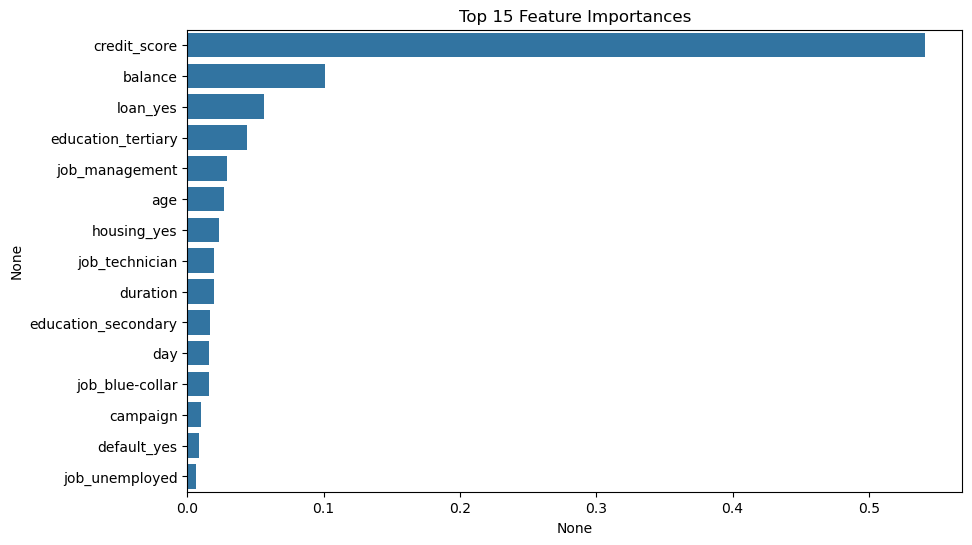

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = models["Random Forest"].feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances")
plt.show()


Before SMOTE: {1: 1609, 2: 1005, 3: 752, 4: 211, 0: 39}
After SMOTE: {1: 1609, 3: 1609, 2: 1609, 4: 1609, 0: 1609}
Accuracy: 0.9977900552486187
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       402
           2       0.99      1.00      1.00       252
           3       1.00      1.00      1.00       188
           4       1.00      0.96      0.98        53

    accuracy                           1.00       905
   macro avg       1.00      0.99      1.00       905
weighted avg       1.00      1.00      1.00       905



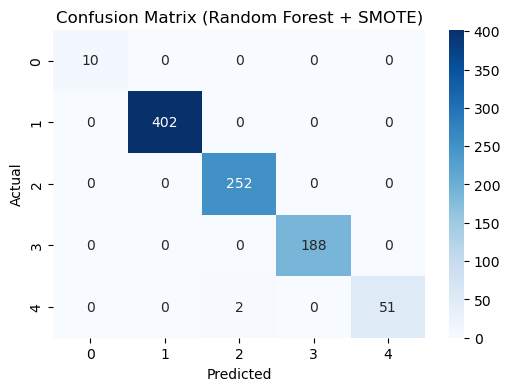

['credit_scoring_model.pkl']

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import joblib

# --- SMOTE for imbalance handling ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("After SMOTE:", dict(pd.Series(y_resampled).value_counts()))

# --- Train Random Forest with SMOTE data ---
rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote.fit(X_resampled, y_resampled)

y_pred_smote = rf_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest + SMOTE)")
plt.show()

# Save the model
joblib.dump(rf_smote, "credit_scoring_model.pkl")


In [43]:
import joblib
import pandas as pd

# 1. Load your saved pipeline
pipeline = joblib.load("credit_model_pipeline.pkl")

# 2. Get the feature names the pipeline was trained with
try:
    feature_names = pipeline[:-1].get_feature_names_out()
except:
    feature_names = pipeline.feature_names_in_

print("Model expects features:", feature_names)

# 3. Create a blank customer row with all features set to 0
new_customer = pd.DataFrame([{col: 0 for col in feature_names}])

# 4. Update the row with actual values
new_customer.update(pd.DataFrame([{
    "age": 32,
    "balance": 1500,
    "day": 5,
    "duration": 120,
    "campaign": 2,
    "default_yes": 0,
    "education_secondary": 1,
    # add other real values here...
}]))

# 5. Predict
prediction = pipeline.predict(new_customer)
print("Predicted Credit Rating:", prediction[0])


Model expects features: ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous'
 'credit_score' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_married' 'marital_single' 'education_secondary'
 'education_tertiary' 'education_unknown' 'default_yes' 'housing_yes'
 'loan_yes' 'contact_telephone' 'contact_unknown' 'month_aug' 'month_dec'
 'month_feb' 'month_jan' 'month_jul' 'month_jun' 'month_mar' 'month_may'
 'month_nov' 'month_oct' 'month_sep' 'poutcome_other' 'poutcome_success'
 'poutcome_unknown' 'y_yes']
Predicted Credit Rating: 1


In [53]:
import joblib
import pandas as pd

# Load pipeline
pipeline = joblib.load("credit_model_pipeline.pkl")

# Example new customer
new_customer = pd.DataFrame([{
    "age": 32,
    "balance": 1500,
    "day": 5,
    "duration": 120,
    "campaign": 2,
    "pdays": -1,
    "previous": 0,
    "credit_score": 650,
    "job_blue-collar": 0,
    "job_entrepreneur": 0,
    "job_housemaid": 0,
    "job_management": 1,
    "job_retired": 0,
    "job_self-employed": 0,
    "job_services": 0,
    "job_student": 0,
    "job_technician": 0,
    "job_unemployed": 0,
    "job_unknown": 0,
    "marital_married": 1,
    "marital_single": 0,
    "education_secondary": 1,
    "education_tertiary": 0,
    "education_unknown": 0,
    "default_yes": 0,
    "housing_yes": 1,
    "loan_yes": 0,
    "contact_telephone": 0,
    "contact_unknown": 1,
    "month_aug": 0,
    "month_dec": 0,
    "month_feb": 0,
    "month_jan": 0,
    "month_jul": 0,
    "month_jun": 0,
    "month_mar": 0,
    "month_may": 1,
    "month_nov": 0,
    "month_oct": 0,
    "month_sep": 0,
    "poutcome_other": 0,
    "poutcome_success": 0,
    "poutcome_unknown": 1,
    "y_yes": 0  # optional, can be dropped in inference
}])

# Predict yes/no
prediction = pipeline.predict(new_customer)
print("Predicted Result:", "Yes (Approved)" if prediction[0] == 1 else "No (Not Approved)")


Predicted Result: No (Not Approved)


In [5]:
import pandas as pd

importances = pipeline.named_steps["classifier"].feature_importances_
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]
print(feat_imp)


num__credit_score           0.510975
num__balance                0.100682
cat__loan_yes               0.039620
cat__education_tertiary     0.038207
cat__loan_no                0.033848
cat__job_management         0.029111
num__age                    0.026427
cat__job_technician         0.020418
cat__education_secondary    0.017552
num__duration               0.015871
dtype: float64
